# Interface

In [9]:
import cpu_solver as cpu
import gpu_solver as gpu
import numpy
from matplotlib import pyplot, cm

### Lid Driven Cavity Case

The lid driven cavity problem is a popular benchmark in computational fluid dynamics (CFD). It involves a square 2D domain where the top lid moves at a constant velocity while the other walls remain stationary. The expected output is a singular large rotating mass of fluid in the centre of the domain (with smaller vortices inevitably forming as well). 

You will be able to specify
1.  Kinematic Viscosity 
1.  Horizontal Velocity of the Lid 
1.  Density of the Fluid 
1.  Time Step 
1.  Total Duration 
1.  Grid Size 
1.  Internal Poisson Iterations 

In [24]:
number_of_grid_steps = 41               #square grid, therefore x and y step counts are always the same
time_step_size = .001                  #seconds
time_step_count = 2000                   #time_step_size * time_step_count = total simulation time
kinematic_viscosity = 0.1               #kinematic viscosity m^2/s
horiz_velocity = 1                      #m/s
density = 1                             #kg/m^3
    
poisson_iterations = 50                #internal iterations to calculate pressre

nvidia_gpu_present = False              #if nvidia gpu present, gpu compute is available
    
if nvidia_gpu_present == True:
    gpu.solve(
        number_of_grid_steps, 
        time_step_size, 
        time_step_count, 
        kinematic_viscosity, 
        horiz_velocity, 
        density, 
        poisson_iterations
        )
else:
    p = cpu.solve(
        number_of_grid_steps, 
        time_step_size, 
        time_step_count, 
        kinematic_viscosity, 
        density, 
        poisson_iterations
        )

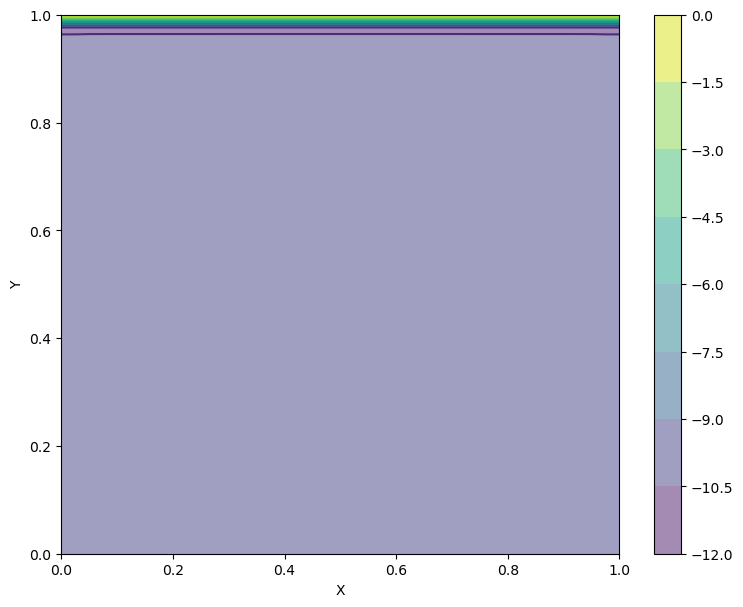

In [32]:
x = numpy.linspace(0, 1, number_of_grid_steps)
y = numpy.linspace(0, 1, number_of_grid_steps)
X, Y = numpy.meshgrid(x, y)
fig = pyplot.figure(figsize=(9, 7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
#pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()